Importing libraries

In [94]:
import pandas as pd

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [95]:
df = pd.read_excel("fruits.xlsx")

Visualisation of dataset with scatter plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

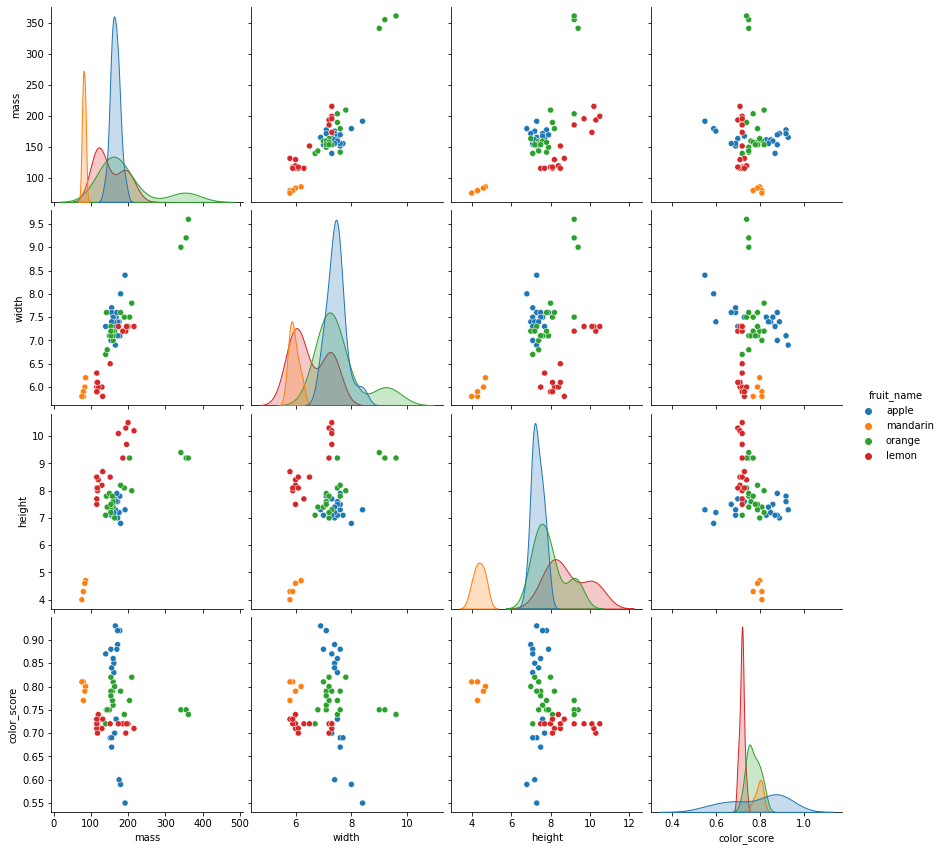

In [97]:
plt.figure()
sns.pairplot(df.drop("fruit_label", axis=1), hue = "fruit_name", size=3)
plt.show()

Preview of Dataset

In [98]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


Seperating dataset into features(X) and label(Y).

In [99]:
X = df.drop(['fruit_label','fruit_name'], axis=1)
Y = df['fruit_label']

Spliting the Features and Labels into training and testing sets.

In [100]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

Converting the training and test into numpy array for calculation purpose.

In [101]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

loading numpy

In [102]:
import numpy as np

**Calculate Distance**

Finds the k nearest neighbors of x_Test in x_Train.

Input:
  
    xTrain = n x d matrix. n=rows and d=features
  
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
  
    k = number of nearest neighbors to be found

Output:
  
    dists = distances between all xTrain and all XTest points. Size of n x m
  
    indices = k x m matrix with the indices of the yTrain labels that represent the point

The following function calculates the Euclidean distances.

In [103]:
def knn_distances(xTrain,xTest,k):
  distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]
  distances[distances < 0] = 0
  distances = distances**.5
  indices = np.argsort(distances, 0)
  distances = np.sort(distances,0)
  return indices[0:k,:], distances[0:k,:]

**Prediction**

Uses xTrain and yTrain to predict xTest.

Input:

    xTrain = n x d matrix. n=rows and d=features
    yTrain = n x 1 array. n=rows with label value
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found

Output:

    predictions = predicted labels, ie preds(i) is the predicted label of xTest(i,:)

Funciton for prediction

In [104]:
def knn_predictions(xTrain,yTrain,xTest,k):
  indices, distances = knn_distances(xTrain,xTest,k)
  yTrain = yTrain.flatten()
  rows, columns = indices.shape
  predictions = list()
  for j in range(columns):
    temp = list()
    for i in range(rows):
      cell = indices[i][j]
      temp.append(yTrain[cell])
    predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
  predictions=np.array(predictions)
  return predictions

**Calculate Accuracy**

Evaluates accuracy of the knn_predictions. Returns a value between 0 and 100%.

Input:

    yTest = array of shape (n,) where n = rows in test set
    preds = array of shape (n,) where n = rows in test set

Output:

    accuracy = % of correct answers in the prediction

In [105]:
def knn_accuracy(yTest,predictions):
    x=yTest.flatten()==predictions.flatten()
    grade=np.mean(x)
    return np.round(grade*100,2)

Predicting the test set using the training data

In [115]:
predictions = knn_predictions(x_train, y_train, x_test,3)
print('Size of Predictions Array:\n', predictions.shape)

Size of Predictions Array:
 (18,)


Accuracy for the test set for k value 3 (k=3)

In [116]:
print('Accuracy:',knn_accuracy(predictions,y_test),'%')

Accuracy: 38.89 %


**Finding the best k value**

In [108]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

will first check which is the best k.

In [109]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    #neigh = KNeighborsClassifier(n_neighbors = n).fit(xTrain,yTrain)
    #yhat=neigh.predict(xTest)
    yhat = knn_predictions(x_train,y_train,x_test,n)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1)

The best accuracy was: 55.56 % with k= 1


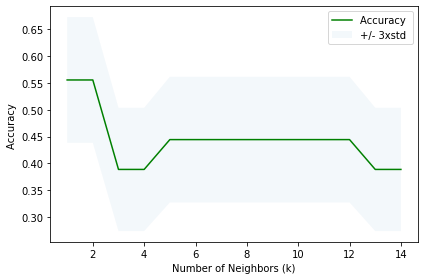

In [110]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.05)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

Test case with Predicted fruits

In [126]:
fruits = ["","apple","mandarin","orange","lemon"]
x_test_1 = np.array([[196,6,4.6,0.5]])
predictions = knn_predictions(x_train, y_train, x_test_1,1)
print("Predicted :  ",fruits[predictions[0]])

x_test_2 = np.array([[210,7.8,8,0.4]])
predictions = knn_predictions(x_train, y_train, x_test_2,1)
print("Predicted :  ",fruits[predictions[0]])

x_test_3 = np.array([[194,7.2,10.3,0.7]])
predictions = knn_predictions(x_train, y_train, x_test_3,1)
print("Predicted :  ",fruits[predictions[0]])

Predicted :   lemon
Predicted :   orange
Predicted :   lemon
